In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
import math

%matplotlib inline

### Задание 1: Титаник

In [2]:
titanic = pd.read_csv("titanic.csv")

##### Какое количество мужчин и женщин ехало на корабле?

In [3]:
print("Всего пассажиров: %5d" % (len(titanic)))
print("Мужчин: %15d" % (len(titanic[titanic['Sex'] == 'male'])))
print("Женщин: %15d" % (len(titanic[titanic['Sex'] == 'female'])))

Всего пассажиров:   891
Мужчин:             577
Женщин:             314


##### Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров.

In [4]:
print("Всего пассажиров: %5d" % (len(titanic)))
print("Выжило: %15d" % (len(titanic[titanic['Survived'] == 1])))
print("Процент выживших: %6.2f" % (len(titanic[titanic['Survived'] == 1]) / len(titanic)))

Всего пассажиров:   891
Выжило:             342
Процент выживших:   0.38


##### Какую долю пассажиры первого класса составляли среди всех пассажиров? Постройте круговую диаграмму по всем классам пассажиров.

Всего пассажиров:                     891
Пассажиры первого класса:             216
Процент пассажиров первого класса:    0.24


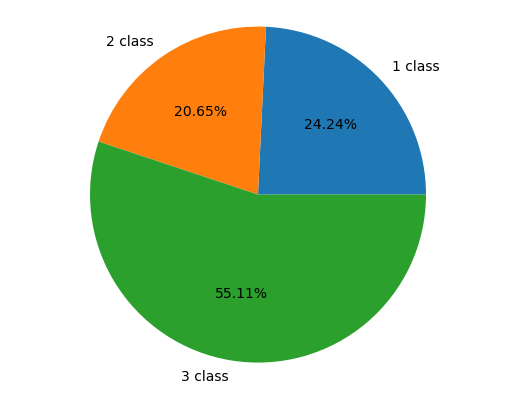

In [5]:
print("Всего пассажиров: %23d" % (len(titanic)))
print("Пассажиры первого класса: %15d" % (len(titanic[titanic['Pclass'] == 1])))
print("Процент пассажиров первого класса: %7.2f" % (len(titanic[titanic['Pclass'] == 1]) / len(titanic)))

classes = sorted(titanic['Pclass'].unique().tolist())
data = [len(titanic[titanic['Pclass'] == val]) for val in classes]

fig, ax = plt.subplots()
ax.pie(data, labels=[str(x) + " class" for x in classes], autopct='%1.2f%%')
fig.set_facecolor('white')
ax.axis('equal')
plt.show()

##### Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. В чем статистическая разница между показателями медианы и среднего? Выведите любой перцентиль возраста пассажиров. Что показывает перцентиль в статистике?

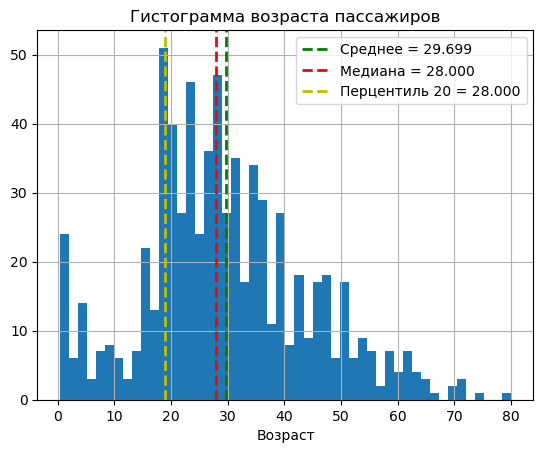

In [42]:
ages = titanic['Age'].dropna().to_list()
avr = np.average(ages)
med = np.median(ages)
per = np.percentile(ages, 20)

plt.hist(ages, bins=50)
plt.axvline(avr, color='g', linestyle='dashed',
            linewidth=2, label=f"Среднее = {avr:.3f}") 
plt.axvline(med, color='r', linestyle='dashed',
            linewidth=2, label=f"Медиана = {med:.3f}") 
plt.axvline(per, color='y', linestyle='dashed',
            linewidth=2, label=f"Перцентиль 20 = {med:.3f}") 
plt.grid()
plt.xlabel("Возраст")
plt.title("Гистограмма возраста пассажиров")
plt.legend()
plt.show()

Среднее значение считается, как sum(data) / len(data)

Медиана это значение находящееся посередине в отсортированном data

Перцентиль N - это число которое больше либо равно N% data  

##### Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Что показывает корреляция?

In [7]:
vars = titanic.loc[:, ['SibSp', 'Parch']]
vars.corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


Корреляция показывает зависимость переменных друг от друга

##### Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name).

In [39]:
names = [name.split('. ')[1].replace(')', '').split('(')[-1].split(' ')[0] for name in titanic[titanic['Sex'] == 'female'].loc[:, 'Name'].to_list()]
print(f"Самое популярное имя: {max(set(names), key=names.count)}")

Самое популярное имя: Anna


### Задание 2: Аппроксимация

[1, 1] 3.252216865271419
[1, 15] 0.6352214195786656
[ 3.43914511 -0.18692825]

[1, 1, 1] 3.252216865271419
[1, 8, 64] 2.316170159053224
[1, 15, 225] 0.6352214195786656
[ 3.32512949 -0.06531159 -0.00760104]

[1, 1, 1, 1] 3.252216865271419
[1, 4, 16, 64] 1.7468459495903677
[1, 10, 100, 1000] 2.5054164070002463
[1, 15, 225, 3375] 0.6352214195786656
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]



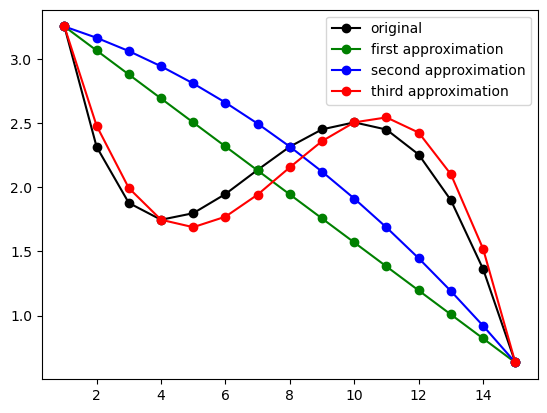

In [65]:
def func(x):
    return math.sin(x/5)*math.exp(x/10)+5*math.exp(-x/2)

def get_params(X: list):
    Y = [func(x) for x in X]
    P = []
    for i in range(len(X)):
        P.append([X[i]**k for k in range(0, len(X))])
    for i in range(len(X)):
        print(P[i], Y[i])

    A = scipy.linalg.solve(P, Y)
    print(A)
    print()
    return A

def appr(x, A: list):
    ans = 0
    for i in range(len(A)):
        ans += x**i * A[i]
    return ans

A1 = get_params([1, 15])
A2 = get_params([1, 8, 15])
A3 = get_params([1, 4, 10, 15])

X = np.arange(1, 16).tolist()
Y0 = [func(x) for x in X]
Y1 = [appr(x, A1) for x in X]
Y2 = [appr(x, A2) for x in X]
Y3 = [appr(x, A3) for x in X]

plt.plot(X, Y0, '-ok', label='original')
plt.plot(X, Y1, '-og', label='first approximation')
plt.plot(X, Y2, '-ob', label='second approximation')
plt.plot(X, Y3, '-or', label='third approximation')
plt.legend()
plt.show()

Апроксимация может быть необходима, чтобы получить функцию подобную той, у которой известны только значения в некоторых точках. Помимо этого апроксимация позволяет упрощать сложные модели, тем самым уменьшая количество и сложность необходимых вычислений